## **Imports and Data Split**

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Apple Stock Price Prediction practice/AAPL.csv', date_parser=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2469,2019-10-24,244.509995,244.800003,241.809998,243.580002,241.621826,17318800
2470,2019-10-25,243.160004,246.729996,242.880005,246.580002,244.597717,18369300
2471,2019-10-28,247.419998,249.250000,246.720001,249.050003,247.047867,24143200
2472,2019-10-29,248.970001,249.750000,242.570007,243.289993,241.334152,35709900
2473,2019-10-30,244.759995,245.300003,241.210007,243.259995,241.304398,31130500


In [ ]:
train = df[df['Date']<='2018-12-31']

In [ ]:
test = df[df['Date']>'2018-12-31']

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700


In [ ]:
train.drop(['Date', 'High', 'Open', 'Low', 'Adj Close', 'Volume'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train.head()

,Close
0,30.572857
1,30.625713
2,30.138571
3,30.082857
4,30.282858


In [ ]:
test.drop(['Date', 'High', 'Open', 'Low', 'Adj Close', 'Volume'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test.head()

,Close
2264,157.919998
2265,142.190002
2266,148.259995
2267,147.929993
2268,150.750000


## **Scaling of Train Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_scaled = scaler.fit_transform(train)

In [ ]:
train_scaled = np.array(train_scaled)

In [ ]:
train_scaled.shape

(2264, 1)

In [ ]:
x_train=[]
y_train=[]

In [ ]:
for i in range(10, train_scaled.shape[0]):
  x_train.append(train_scaled[i-10:i])
  y_train.append(train_scaled[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2254, 10, 1)

In [ ]:
y_train.shape

(2254,)

## **LSTM MODEL**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(50, activation='relu', input_shape=(10,1), return_sequences=True),
                                    tf.keras.layers.Dropout(0.1),

                                    tf.keras.layers.LSTM(80, activation='relu', return_sequences=True),
                                    tf.keras.layers.Dropout(0.15),

                                    tf.keras.layers.LSTM(80, activation='relu', return_sequences=True),
                                    tf.keras.layers.Dropout(0.15),

                                    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.GlobalMaxPooling1D(),

                                    tf.keras.layers.Dense(1)


])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
71/71 [==============================] - 2s 29ms/step - loss: 0.0337
Epoch 2/100
71/71 [==============================] - 2s 28ms/step - loss: 0.0013
Epoch 3/100
71/71 [==============================] - 2s 29ms/step - loss: 0.0010
Epoch 4/100
71/71 [==============================] - 2s 28ms/step - loss: 0.0011
Epoch 5/100
71/71 [==============================] - 2s 28ms/step - loss: 9.2427e-04
Epoch 6/100
71/71 [==============================] - 2s 27ms/step - loss: 9.4619e-04
Epoch 7/100
71/71 [==============================] - 2s 28ms/step - loss: 9.3770e-04
Epoch 8/100
71/71 [==============================] - 2s 28ms/step - loss: 9.1258e-04
Epoch 9/100
71/71 [==============================] - 2s 29ms/step - loss: 7.5600e-04
Epoch 10/100
71/71 [==============================] - 2s 29ms/step - loss: 7.2343e-04
Epoch 11/100
71/71 [==============================] - 2s 28ms/step - loss: 7.7310e-04
Epoch 12/100
71/71 [==============================] - 2s 28ms/step - loss: 7.64

## **Test Data Preparation**

In [ ]:
test.head()

,Close
2264,157.919998
2265,142.190002
2266,148.259995
2267,147.929993
2268,150.750000


In [ ]:
last_10_days = train.tail(10)

In [ ]:
test = last_10_days.append(test)

In [ ]:
test

,Close
2254,163.940002
2255,166.070007
2256,160.889999
2257,156.830002
2258,150.729996
...,...
2469,243.580002
2470,246.580002
2471,249.050003
2472,243.289993


In [ ]:
test = test.reset_index()

In [ ]:
test.head()

,index,Close
0,2254,163.940002
1,2255,166.070007
2,2256,160.889999
3,2257,156.830002
4,2258,150.729996


In [ ]:
test.drop(['index'], axis=1, inplace=True)

In [ ]:
test.head()

,Close
0,163.940002
1,166.070007
2,160.889999
3,156.830002
4,150.729996


In [ ]:
test = scaler.fit_transform(test)

In [ ]:
test = np.array(test)

In [ ]:
test.shape

(220, 1)

In [ ]:
x_test = []
y_test = []

In [ ]:
for i in range(10, test.shape[0]):
  x_test.append(test[i-10:i])
  y_test.append(test[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

## **Single-Step Prediction**

In [ ]:
y_pred = model.predict(x_test)

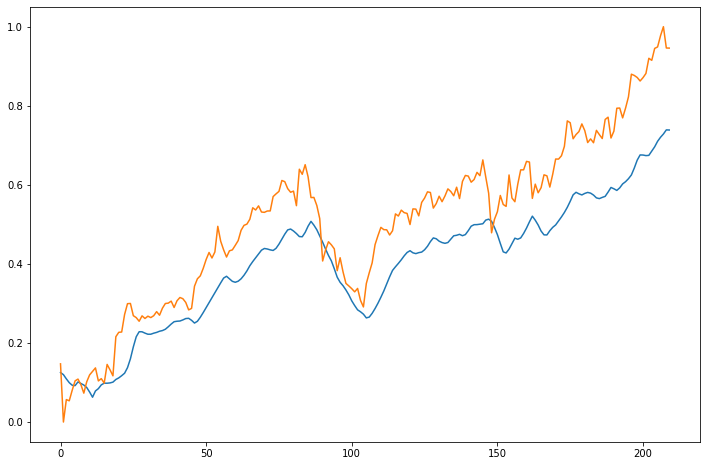

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_true')

## **Multi-Step Prediction**

In [ ]:
x_test.shape

(210, 10, 1)

In [ ]:
x_10 = x_test[0]

In [ ]:
x_10.shape

(10, 1)

In [ ]:
y_temp = model.predict(x_10.reshape(1,10,1))

In [ ]:
y_temp.shape

(1, 1)

In [ ]:
new_10 = np.append(x_10, y_temp)

In [ ]:
new_10[1:].reshape(10,1)

array([[0.22347001],
       [0.17499529],
       [0.13700168],
       [0.07991759],
       [0.0434213 ],
       [0.14018338],
       [0.13063814],
       [0.1313868 ],
       [0.14551753],
       [0.12519452]])

In [ ]:
temp_x = x_test[0]

for i in range(0, x_test.shape[0]):
  y_temp = model.predict(temp_x[i:].reshape(1,10,1))
  temp_x = np.append(temp_x, y_temp)
  temp_x.reshape(11+i, 1)

In [ ]:
temp_x

array([0.20353734, 0.22347001, 0.17499529, 0.13700168, 0.07991759,
       0.0434213 , 0.14018338, 0.13063814, 0.1313868 , 0.14551753,
       0.12519452, 0.11961178, 0.1100259 , 0.10302465, 0.10098006,
       0.10378119, 0.11375631, 0.11116502, 0.10864874, 0.10648955,
       0.10256896, 0.10038742, 0.09893475, 0.09845109, 0.09868324,
       0.09909567, 0.09866577, 0.0972898 , 0.09610174, 0.09497432,
       0.09406979, 0.09349799, 0.09310868, 0.0928115 , 0.09249   ,
       0.09204533, 0.09147106, 0.09090121, 0.09041049, 0.08999604,
       0.08965873, 0.08937337, 0.08910623, 0.08883461, 0.0885488 ,
       0.08825527, 0.08797373, 0.08771988, 0.08745439, 0.08719943,
       0.08696877, 0.08675173, 0.08653922, 0.08632718, 0.0861164 ,
       0.0859101 , 0.0857124 , 0.08552313, 0.08533702, 0.08515917,
       0.08499052, 0.08482756, 0.08466776, 0.08451091, 0.08435807,
       0.08421169, 0.08407192, 0.08393785, 0.08380795, 0.0836829 ,
       0.08356226, 0.0834454 , 0.08333197, 0.083222  , 0.08311

In [ ]:
temp_x.shape

(220,)

In [ ]:
y_multistep = temp_x[10:]

In [ ]:
y_multistep.shape

(210,)

## **Prediction Analysis**

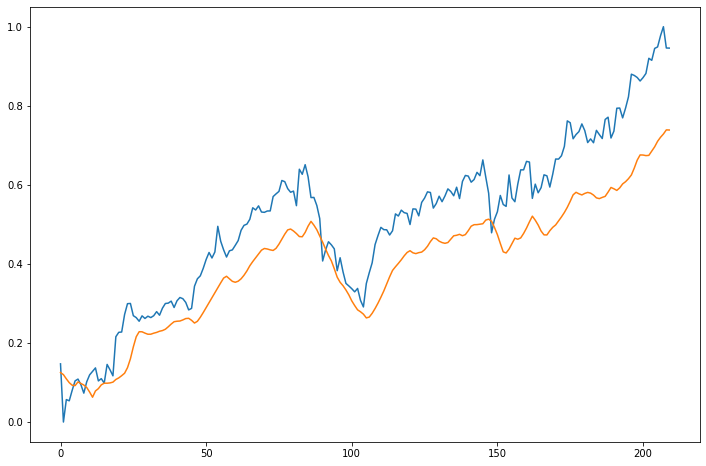

In [ ]:
plt.figure(figsize= (12,8))
plt.plot(y_test)
plt.plot(y_pred)

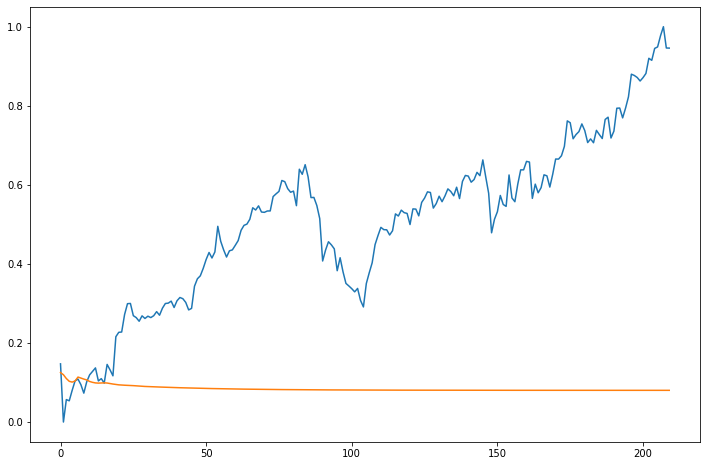

In [ ]:
plt.figure(figsize= (12,8))
plt.plot(y_test)
plt.plot(y_multistep)

The two graphs generated in Single step prediction just differ by a time step, for multi-step prediction prediction after a while the the prediction goes to a constant value and continues that way. For single step the prediction just approximates the last value for the original graph and gives that as prediction. However in multistep that last value since is not changing the graph starts giving the same result again and again hence becoming constant at a certain value
